# K-means
- 課本 5-11 章
- [k-平均演算法](https://zh.wikipedia.org/wiki/K-%E5%B9%B3%E5%9D%87%E7%AE%97%E6%B3%95)

k-平均聚類要把這{\displaystyle n}n個觀測劃分到k個集合中(k≤n),使得組內平方和（WCSS within-cluster sum of squares）最小。
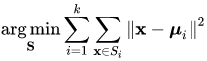

## 演算法
1. 隨機決定k個類別的中心點
2. 計算資料中每個點跟哪個中心點最近，就將該資料分配給那個類別
3. 重新計算每個類別的中心點
4. 一直重複步驟2跟3直到中心點不會變為止

## 範例

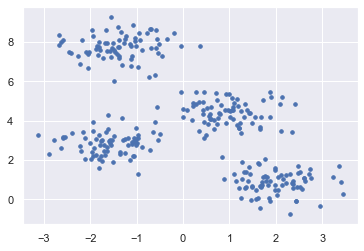

In [7]:
# 產生範例資料
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50, marker ='.');

In [8]:
# 建立kmeans模組並訓練
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

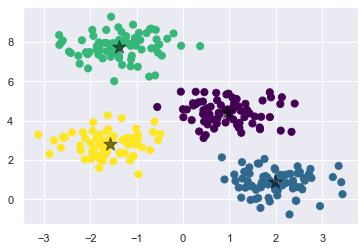

In [15]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5, marker ='*');

## 學習過程
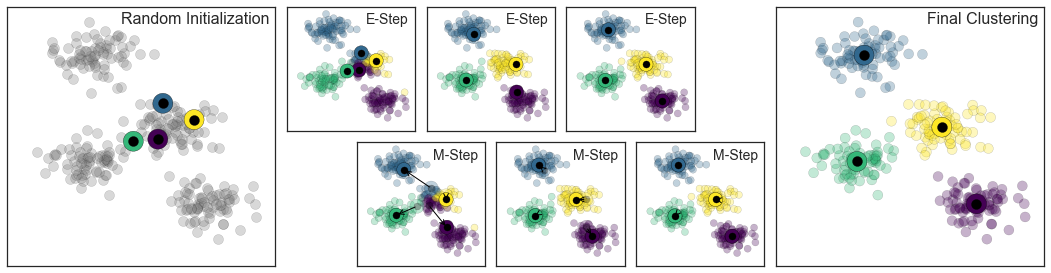

## K 值的選擇
K值 (群聚類別的數量) 如果選錯了會造成錯誤的結果

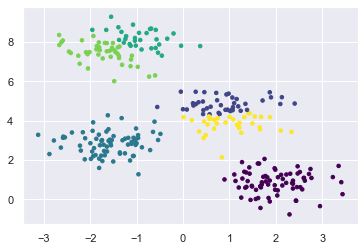

In [21]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis', marker='.');

## K-means只能處理線性分割的問題

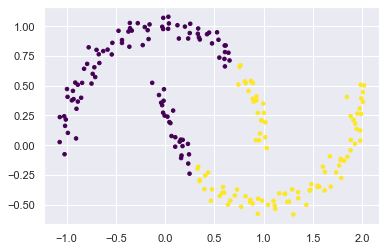

In [22]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis', marker='.');

## SpectralClustering
Kernal版的k-means，可以把輸入變項值投射到高維度去

c:\python38\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


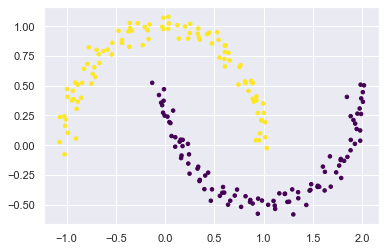

In [24]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis', marker='.');

## 範例 -- 手寫數字辨識

In [25]:
# 載入手寫數字的訓練資料
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [27]:
# 訓練 k-means 模組
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

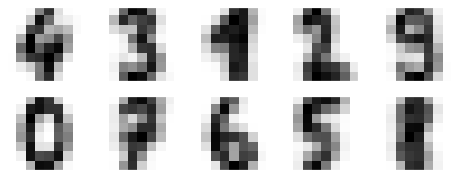

In [29]:
# 將訓練好的 k-means 模組中心點畫出來，從64維度轉換成8*8的點陣圖
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

## 範例 -- 圖形色彩壓縮

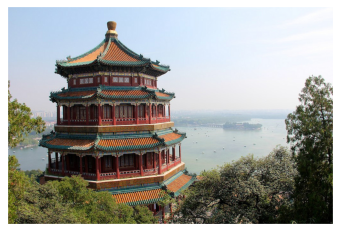

In [30]:
# 載入測試用圖
# Note: this requires the ``pillow`` package to be installed
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

In [32]:
# 圖的基本資料 (寬, 高, 3原色)
china.shape

(427, 640, 3)

In [34]:
# 將資料正規化到 0~1之間
data = china / 255.0 # use 0...1 scale
# 將原本2維的圖形資料展開變成1維
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [35]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

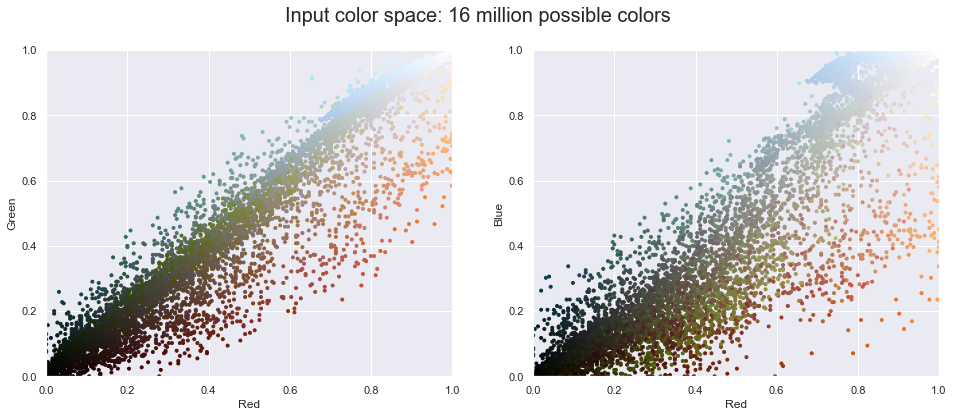

In [37]:
# 將圖形中每個點的顏色畫出來
plot_pixels(data, title='Input color space: 16 million possible colors')

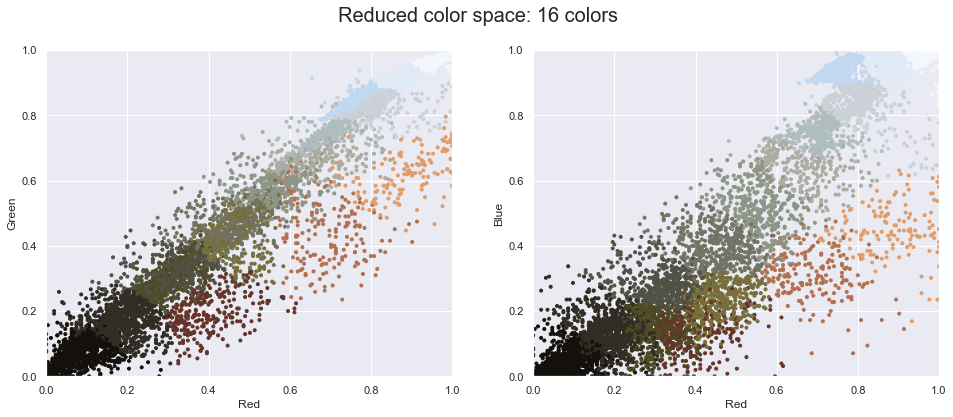

In [38]:
# 使用 k-mean 將顏色壓縮到 16色
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
            title="Reduced color space: 16 colors")

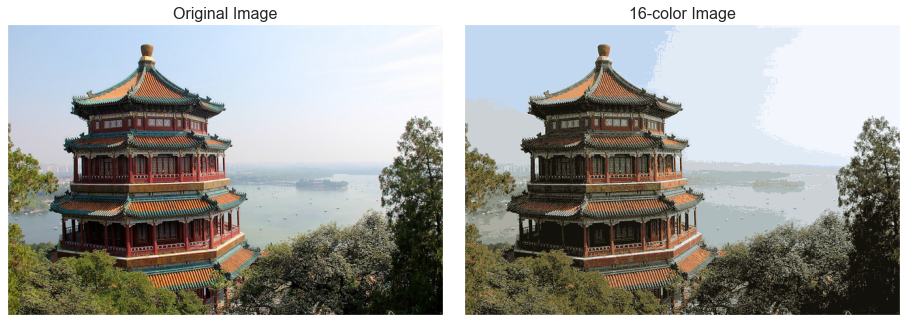

In [39]:
# 展示顏色壓縮結果
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);